In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager
from PIL import Image

In [3]:
df=pd.read_html('https://fbref.com/stathead/player_comparison.cgi?request=1&sum=0&dom_lg=1&player_id1=b19db005&p1yrfrom=2024-2025&player_id2=3423f250&p2yrfrom=2024-2025',
                attrs={"id":"standard_stats"})[0]

In [5]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0    Ousmane Dembélé            2024-25             fr FRA                 FW   
1           Raphinha            2024-25             br BRA              FW,MF   

  Unnamed: 4_level_0 Playing Time                    Performance  ...  \
               Squad           MP Starts   Min   90s         Gls  ...   
0          Paris S-G           29     20  1730  19.2          21  ...   
1          Barcelona           36     32  2839  31.5          18  ...   

  Per 90 Minutes                                                             
             Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0           1.09  0.31  1.40  1.04   1.35  0.86  0.43   1.29  0.82     1.25  
1           0.57  0.29  0.86  0.51   0.79  0.61  0.40   1.01  0.56     0.96  

[2 rows x 34 columns]

In [7]:
df.columns=df.columns.droplevel(0)

In [9]:
df

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Ousmane Dembélé,2024-25,fr FRA,FW,Paris S-G,29,20,1730,19.2,21,...,1.09,0.31,1.40,1.04,1.35,0.86,0.43,1.29,0.82,1.25
1,Raphinha,2024-25,br BRA,"FW,MF",Barcelona,36,32,2839,31.5,18,...,0.57,0.29,0.86,0.51,0.79,0.61,0.40,1.01,0.56,0.96


In [11]:
df.columns

Index(['Player', 'Span', 'Nation', 'Pos', 'Squad', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A',
       'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [27]:
params=['Goals','Assists','Expected Goals\n xG','Non-Penalty\n Expected Goals\n npxG','Expected Assisted\n Goals\nxAG', 'npxG+xAG', 'Progressive Carries\n PrgC','Progressive Passes\n PrgP',
       'Progressive Passes\nReceived\nPrgR']

values=[21,6,16.6,15.8,8.2,24.0,127,137,252] #Dembélé
values_2=[18,9,19.2,17.6,12.7,30.3,94,135,349] #Raphinha

In [174]:
#Minimum range values and maximum range values for paramaters
min_range=[10,0,10,10,0,10,70,130,200]
max_range=[25,10,20,20,15,35,150,140,400]

In [176]:
#Instatiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#EBEBE9", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

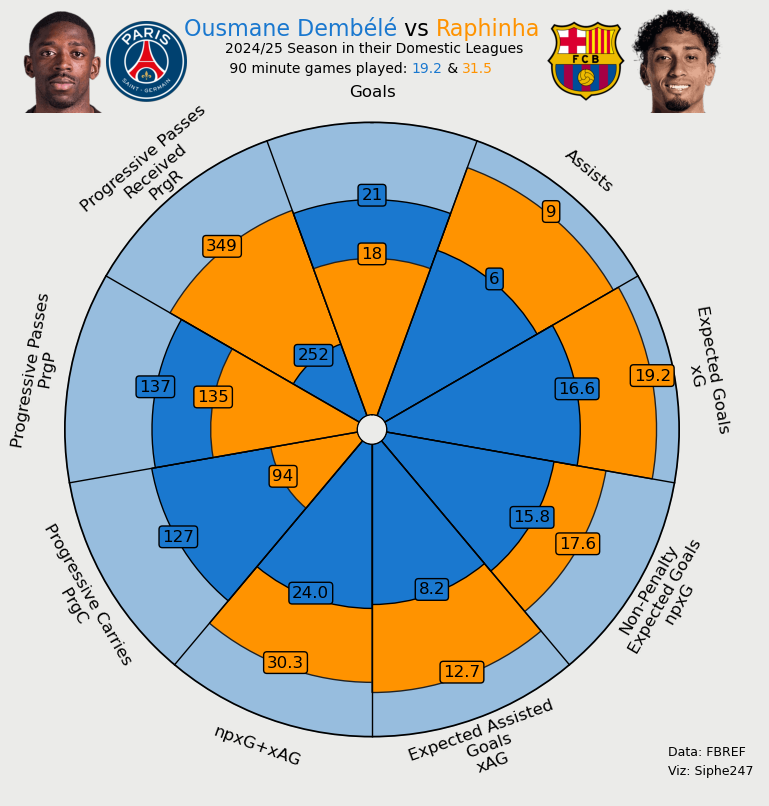

In [308]:
#Plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#ff9300", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#000000", fontsize=12, zorder=5,
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FF9300",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            
)

#Add title
fig_text(
    0.5, 1.01, "<Ousmane Dembélé> vs <Raphinha>",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center",color="#000000"
)

#Add subtitle
fig_text(
    0.515, 0.98, "2024/25 Season in their Domestic Leagues\n 90 minute games played: <19.2> & <31.5>",
    size=10, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center", color="#000000"
)

#Add player images
ax2 = fig.add_axes([.06,0.89,.13,.13])
ax2.axis('off')
img = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Dembele.png')
ax2.imshow(img)
ax=fig.add_axes([.83,0.89,.13,.13])
ax.axis('off')
img3=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Raphinha.png')
ax.imshow(img3)

#Add Barcelona club badge
ax4=fig.add_axes([0.73,0.89,0.1,0.13])
ax4.axis('off')
img=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/FC Barcelona club badge.png')
ax4.imshow(img)

#Add PSG club badge
ax4=fig.add_axes([0.18,0.89,0.1,0.13])
ax4.axis('off')
img=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Ligue 1 Team Logos/Paris S-G_logo.png')
ax4.imshow(img)

#Add credits
CREDIT_1="Data: FBREF"
CREDIT_2="Viz: Siphe247"

fig_text(
    0.99, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Dembélé vs Raphinha.png', dpi=300, bbox_inches='tight')